# Lab: Cross-Validation


**Instructions**

* Read and complete all exercises below in the provided `.qmd` notebook (or `.ipynb` file if you prefer, both files are identical aside from the formatting)
  
**Submission:**

* You need to upload ONE document to Canvas when you are done. 
* A PDF (or HTML) of the completed form of this notebook
* The final uploaded version should NOT have any code-errors present. 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

**Optional**: 

* You can actually work in `R` now inside VS-code using the `.ipynb` format
* Its quite easy to get working: [click here for instructions](https://www.practicaldatascience.org/html/jupyter_r_notebooks.html)
* There are a few benefits to this 
  * (1) You can work 100% in VS-Code (for both R and Python), no need to switch between VSC and R-studio
  * (2) You can work through your cells one at a time and see the incremental progress, similar to using `.ipynb` with python or `rmd` in R-studio.
* With Quarto's `convert` command, you can re-format and jump between the different file-formats. For example, 
* `quarto convert HW-2.rmd` will convert the file to `HW-2.ipynb`
* `quarto convert HW-2.ipynb` will convert the file to `HW-2.qmd`, which can be renamed `HW-2.rmd` or just opened in R-studio like any other `rmd` file, just like normal.
* `quarto render HW-2.ipynb` will render the notebook (either R or Python) into an aesthetically pleasing output.

## Part-1: Demonstration
We will work through the following section in class as a technical example.

### Import

In [1]:
install.packages("ISLR")

Installing package into 'C:/Users/USER/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpGYA0u1\downloaded_packages


In [2]:
# install.packages("ISLR");
library(ISLR) 
require(boot)

Loading required package: boot



In [35]:
# GET INFO ABOUT CROSS VALIDATION PACKAGE
output <- capture.output(help(cv.glm))
cat(output, sep = "\n")

starting httpd help server ...
 done



In [4]:
# GET DATA
data(Auto)
df=Auto

# EXPLORE DATA
print(class(df))
print(dim(df))
print(df[1:3,1:8])

[1] "data.frame"
[1] 392   9
  mpg cylinders displacement horsepower weight acceleration year origin
1  18         8          307        130   3504         12.0   70      1
2  15         8          350        165   3693         11.5   70      1
3  18         8          318        150   3436         11.0   70      1


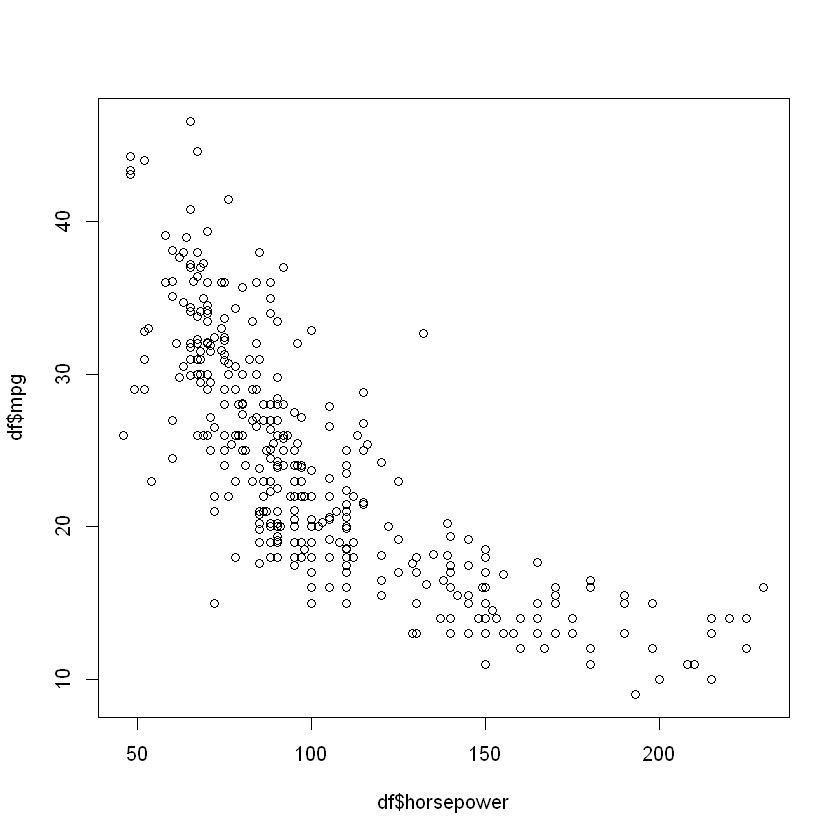

In [5]:
# PLOT THE DATA 
# plot(mpg~horsepower,data = Auto)
plot(df$horsepower,df$mpg)

### Leave-One-Out Cross-Validation

We can do a linear fit as usual with `lm` function

In [6]:
lm.fit=lm(mpg~horsepower,data=df)
# print(lm.fit)
print(coef(lm.fit))

(Intercept)  horsepower 
 39.9358610  -0.1578447 


If we use glm() to fit a model without passing in the family argument, then it performs linear regression, just like the lm() function.

(Intercept)  horsepower 
 39.9358610  -0.1578447 
(Intercept)  horsepower 
 39.9358610  -0.1578447 


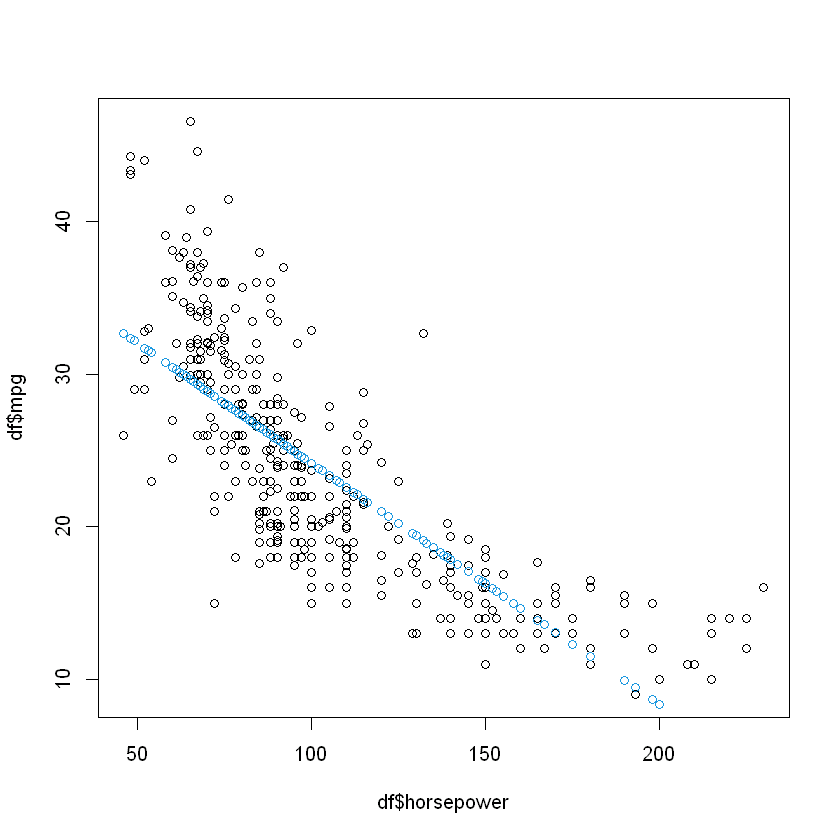

In [7]:
# FIT THE MODEL 
# glm.fit=glm(mpg~horsepower,data=Auto)
glm.fit=glm(mpg~horsepower,data=df)
print(coef(glm.fit))

# PLOT THE RESULTS
b=coef(glm.fit)[1]
m=coef(glm.fit)[2]
print(c(b,m))
plot(df$horsepower,df$mpg)
points(df$horsepower,m*df$horsepower+b, col = "#1b98e0")

You can see the result in identical linear regression models.

We will perform linear regression using the glm() function rather than the lm() function because the former can be used together with the cv.glm() function, which is part of the boot library.

In [8]:
cv=cv.glm(Auto,glm.fit) #pretty slow (doesn't use  formula (5.2))

In [9]:
print(summary(cv))
print(cv$delta)

      Length Class  Mode   
call    3    -none- call   
K       1    -none- numeric
delta   2    -none- numeric
seed  626    -none- numeric
[1] 24.23151 24.23114


In [10]:
## PRINT MSE, RMSE 
ypred=m*df$horsepower+b
y=df$mpg
res=(y-ypred)
print(mean(res**2))
print(mean(abs(res)))
print(mean(res**2)**0.5)

[1] 23.94366
[1] 3.827587
[1] 4.893226


The cv.glm() function produces a list with several components. The two numbers in the delta vector contain the cross-validation results.

The first number we see above is raw the LOOCV result, and the second number is a bias corrected version of it. 

The Bias correction is because the data set that we train on is slightly smaller than the one that we actually would like to get the error for, which is the full data set of size n.

It has more of an effect for K-fold CV. (The adjustment is designed to compensate for the bias introduced by not using leave-one-out cross-validation.)

On this data set, the two estimates are very similar to each other.

This command will likely take a couple of minutes to run.

Let's write a simple function to use formula(5.2)


$$\mathrm{CV}_{(n)}=\frac{1}{n} \sum_{i=1}^n\left(\frac{y_i-\hat{y}_i}{1-h_i}\right)^2 \,\,\,\,\,\,\,\,\,\,(5.2)$$

In [11]:
loocv=function(fit){ #function loocv takes the fit as the argument
  h =lm.influence(fit)$h #lm.influence is a post-processor for lm.fit
  #will extract the element h from that which gives you the diagonal elements
  #of the hat matrix =levarage => put that in a vector h
  mean((residuals(fit)/(1-h))^2) #formula 5.2
  }

#Now lets try it

loocv(glm.fit)

[1] 24.23151

This runs very quickly, and has the same as the result from the previous glm.fit, showing our function works.

Now let's fit polynomials of different degrees(1-5). Because the data looks very non linear.

[1] 24.23151 19.24821 19.33498 19.42443 19.03321


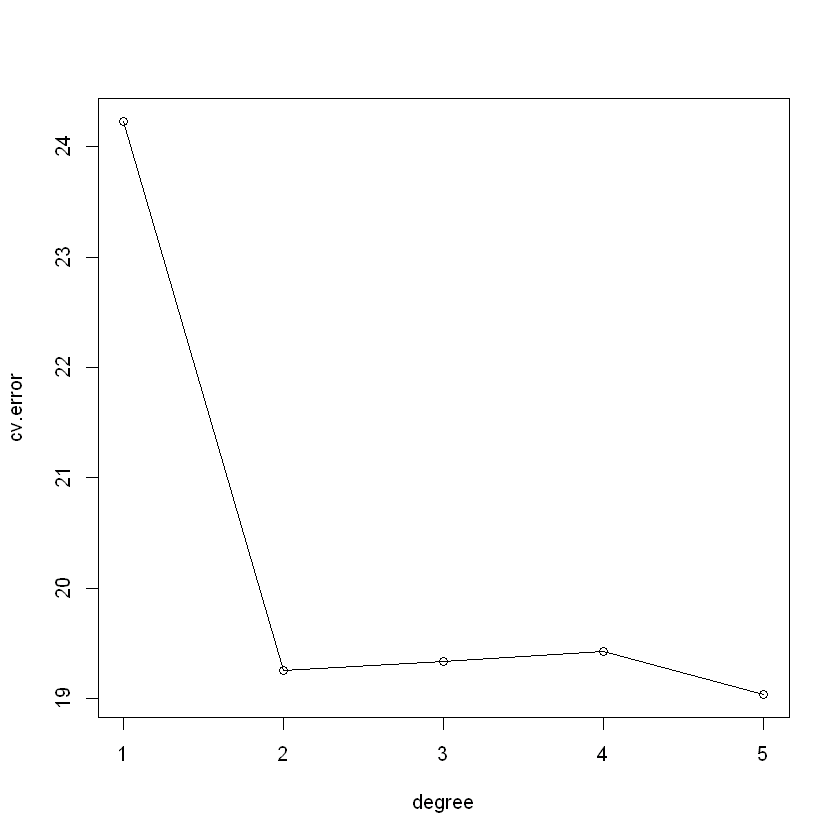

In [12]:
# This code computes the leave-one-out cross-validation errors for polynomial regression models with degrees ranging from 1 to 5 and then plots these errors against the degrees of polynomial. It iterates through each degree, fits a polynomial regression model, computes the leave-one-out cross-validation error using the loocv function, and stores the errors in the vector cv.error. Finally, it prints the errors and creates a plot to visualize how the errors vary with the degrees of polynomial.


# Initialize a vector to store cross-validation errors for degrees 1 to 5
cv.error = rep(0, 5)

# Define degrees of polynomial from 1 to 5
degree = 1:5

# Loop through degrees of polynomial
for (d in degree) {
  # Fit a generalized linear model (GLM) using polynomial regression of degree 'd'
  glm.fit = glm(mpg ~ poly(horsepower, d), data = Auto)
  # Compute the leave-one-out cross-validation error and store it
  cv.error[d] = loocv(glm.fit)  # a vector to collect errors
}

# Print the cross-validation errors
print(cv.error)

# Plot the cross-validation errors against the degrees of polynomial
plot(degree, cv.error, type = 'o')  # plot the error against the degree







Degree 1 does poorly. Degree 2 error jumps down from 24 down to just above 19. Higher degrees really don't make much difference.

By looking at the graph we can conclude that a quadratic model will be a good fit.

### (K=5)-Fold Cross-Validation

[1] 24.27207 19.26909 19.34805 19.29496 19.03198


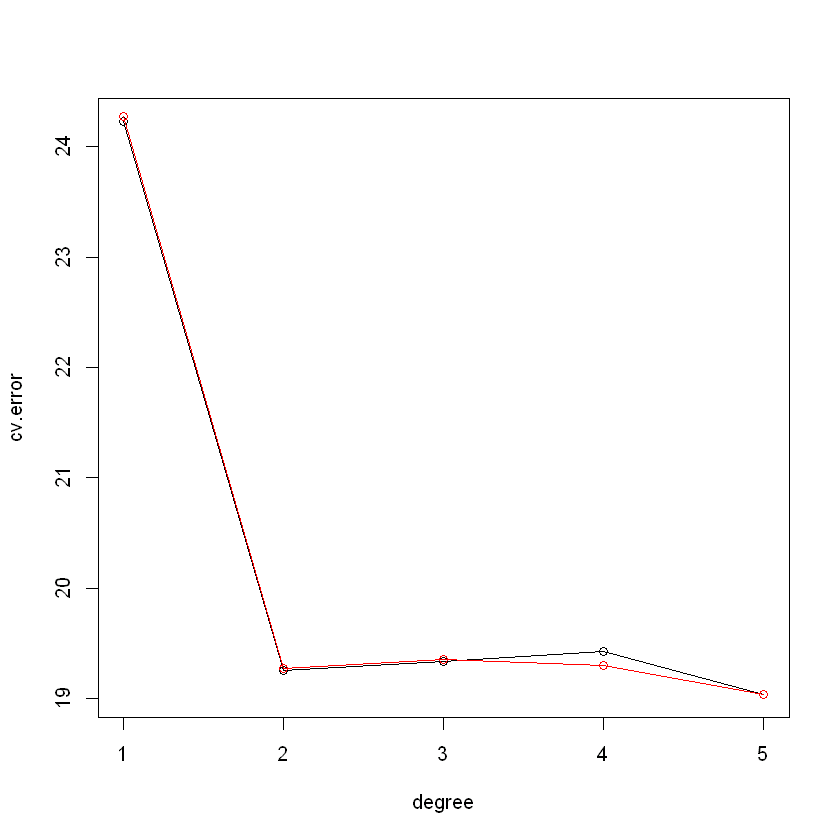

In [13]:
# Set seed for reproducibility
set.seed(17)

# Initialize a vector to store cross-validation errors for degree 1 to 5
cv.error.5 = rep(0, 5)

# Loop through degrees of polynomial (1 to 5)
for (d in degree) {
  # Fit a generalized linear model (GLM) using polynomial regression
  glm.fit = glm(mpg ~ poly(horsepower, d), data = Auto)
  # Store the cross-validation error for each degree of polynomial
  cv.error.5[d] = cv.glm(Auto, glm.fit, K = 10)$delta[1]  # K=10 is the number of folds.
}

# Print the cross-validation errors for degree 1 to 5
print(cv.error.5)

# Plot the cross-validation errors against degrees of polynomial for degree 1 to 10
plot(degree, cv.error, type = 'o')
# Add the cross-validation errors for degree 1 to 5 to the plot in red
lines(degree, cv.error.5, type = "o", col = "red")


It's not much different but more stable (less variation) than LOOCV.

Notice that the computation time is much shorter than that of LOOCV.

### Auto example

(a). What is the best model? 

Best  model: $mpg = -120.14* horsepower + 44.09*(horsepower)^2$  


(b) Compare the cross validation error rate for different splits.


Call:
glm(formula = mpg ~ poly(horsepower, 2), data = Auto)

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.4459     0.2209  106.13   <2e-16 ***
poly(horsepower, 2)1 -120.1377     4.3739  -27.47   <2e-16 ***
poly(horsepower, 2)2   44.0895     4.3739   10.08   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 19.13118)

    Null deviance: 23819  on 391  degrees of freedom
Residual deviance:  7442  on 389  degrees of freedom
AIC: 2274.4

Number of Fisher Scoring iterations: 2


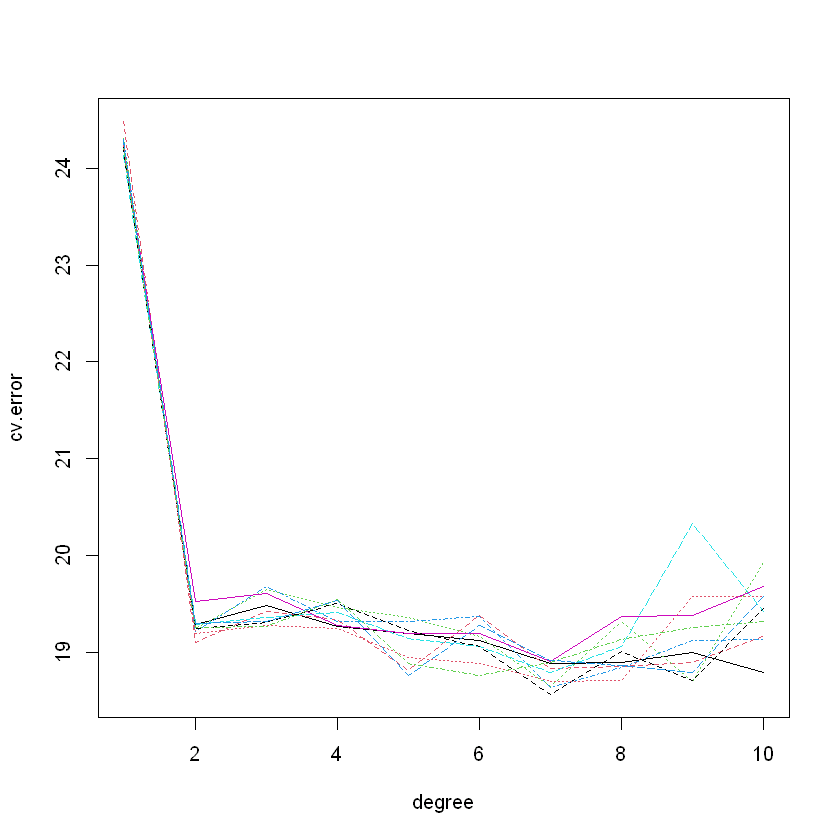

In [14]:
# Initialize a matrix to store cross-validation errors
cv.error = matrix(data = NA, nrow = 10, ncol = 10)

# Loop through degrees of polynomial (1 to 10)
for (j in 1:10) {
  # Loop through iterations for 10-fold cross-validation
  for (i in 1:10) {
    # Fit a generalized linear model (GLM) using polynomial regression
    glm.fit = glm(mpg ~ poly(horsepower, i), data = Auto)
    # Store the cross-validation error in the matrix
    cv.error[i, j] = cv.glm(Auto, glm.fit, K = 10)$delta[1]
  }
}

# Define degrees of polynomial
degree = 1:10

# Plot the cross-validation errors against degrees of polynomial
matplot(degree, cv.error, type = "l")

# Fit the best model with degree 2 polynomial
glm.fit = glm(mpg ~ poly(horsepower, 2), data = Auto)

# Display summary of the best model
summary(glm.fit)


### Example

Consider the built-in data set __cars__ . We wish to predict the braking distance __dist__ from __speed__. Use leave-one-out cross validation to find the best polynomial regression model. Repeat with 10-fold cross validation. Compare the two answers. 

__Solution.__

First, use leave-one-out cross validation. We can use degrees 1 to 15 to fit polynomial models.

Next Plot the results. It turns out that the delta values of very large if the degree of the polynomial is large., therefore it is better to plot the logarithms (done below).

The model with minimal delta for leave-one-out cross validation is 2 (black circle).

The model with minimal delta for 10-fold  cross validation is also 2 (red triangle). _This depends on the random seed with which the cross validation is done._ 

In [15]:
# GET DATA

# Set seed for reproducibility
set.seed(101)

# Load the datasets library
library(datasets)

# Load the 'cars' dataset
data(cars)

# Create a data frame to store results with degrees ranging from 1 to 15
results.41 <- data.frame(degree = 1:15, delta.loo = NA, delta.k10 = NA)


In [16]:
# DATAFRAME FOR OUTPUTS
print(head(cars))
print(dim(cars))

  speed dist
1     4    2
2     4   10
3     7    4
4     7   22
5     8   16
6     9   10
[1] 50  2


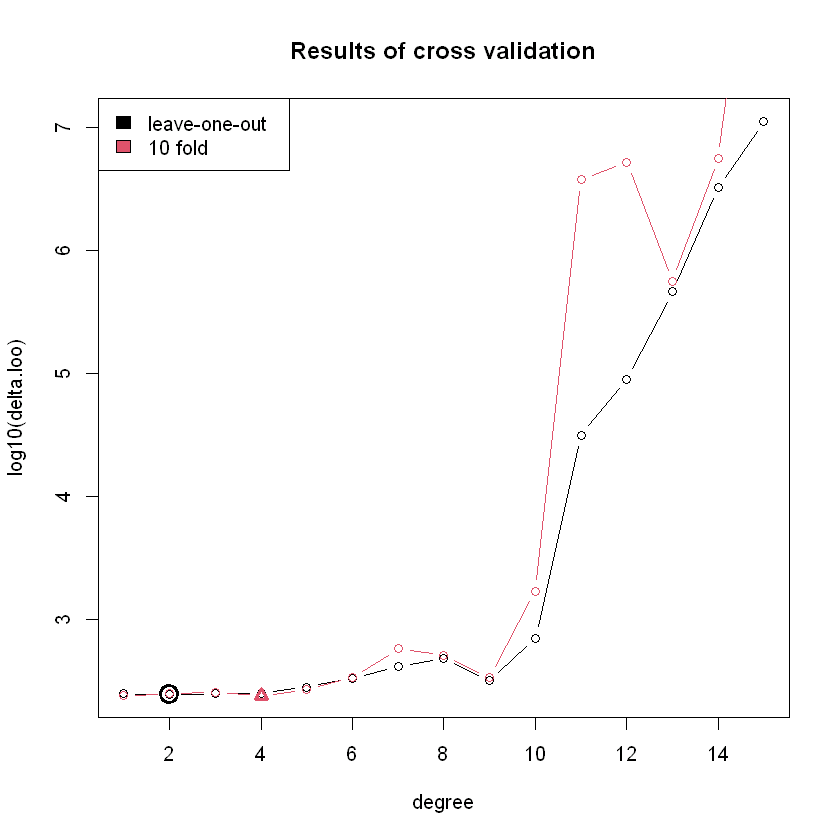

In [17]:
# Commenting the code

# Loop through degrees of polynomial from 1 to 15
for (j in 1:15) {
  # Fit a generalized linear model (GLM) using polynomial regression
  fit.41 = glm(dist ~ poly(speed, j), data = cars)
  
  # Perform leave-one-out cross-validation
  fit.loo <- cv.glm(cars, fit.41, K = 50)  # Using 50-fold cross-validation
  
  # Perform 10-fold cross-validation
  fit.k10 <- cv.glm(cars, fit.41, K = 10)   # Using 10-fold cross-validation
  
  # Store the delta values for each degree of polynomial
  results.41$delta.loo[j] <- fit.loo$delta[1]  # Store leave-one-out delta
  results.41$delta.k10[j] <- fit.k10$delta[1]  # Store 10-fold delta
}

# Plotting the results of cross-validation
plot(log10(delta.loo) ~ degree, data = results.41, type = 'b',
     main = "Results of cross validation")

# Adding legend to the plot
legend(x = "topleft", legend = c("leave-one-out", "10 fold"), fill = 1:2)

# Finding the degree of polynomial with the minimum delta for leave-one-out cross-validation
n.1 <- which.min(results.41$delta.loo)
points(n.1, log10(results.41$delta.loo[n.1]), lwd = 3, col = 1, cex = 2)

# Finding the degree of polynomial with the minimum delta for 10-fold cross-validation
n.2 <- which.min(results.41$delta.k10)
points(n.2, log10(results.41$delta.k10[n.2]), lwd = 3, pch = 2, col = 2)

# Adding lines to the plot for 10-fold cross-validation
lines(log10(delta.k10) ~ degree, data = results.41, type = 'b', col = 2)


## Part-2: Lab Assignment

### Cross Validation Approaches

We'll consider a regression problem with the Carseats dataset.

**Lab-2.1.1** Fit a linear model to predict Sales from all other attributes. Looking at the model summary, what is the residual error?

In [18]:
# INSERT CODE HERE

# Load library
library(ISLR)

# Load the dataset
data(Carseats)

# Fit a linear model to predict Sales using all other variables
lm.fit <- lm(Sales ~ ., data = Carseats)

# Display the model summary
summary(lm.fit)



Call:
lm(formula = Sales ~ ., data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8692 -0.6908  0.0211  0.6636  3.4115 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.6606231  0.6034487   9.380  < 2e-16 ***
CompPrice        0.0928153  0.0041477  22.378  < 2e-16 ***
Income           0.0158028  0.0018451   8.565 2.58e-16 ***
Advertising      0.1230951  0.0111237  11.066  < 2e-16 ***
Population       0.0002079  0.0003705   0.561    0.575    
Price           -0.0953579  0.0026711 -35.700  < 2e-16 ***
ShelveLocGood    4.8501827  0.1531100  31.678  < 2e-16 ***
ShelveLocMedium  1.9567148  0.1261056  15.516  < 2e-16 ***
Age             -0.0460452  0.0031817 -14.472  < 2e-16 ***
Education       -0.0211018  0.0197205  -1.070    0.285    
UrbanYes         0.1228864  0.1129761   1.088    0.277    
USYes           -0.1840928  0.1498423  -1.229    0.220    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual

Residual standard error: 1.019 on 388 degrees of freedom

**Lab-2.1.2** Fit another linear model, but now do not include the predictors Population, Education, Urban, and US. What is the residual error? 

In [19]:
# INSERT CODE HERE

# Load library
library(ISLR)

# Load the dataset
data(Carseats)

# Build a linear model, excluding Population, Education, Urban, and US variables
lm.fit2 <- lm(Sales ~ . - Population - Education - Urban - US, data = Carseats)

# Display model summary
summary(lm.fit2)



Call:
lm(formula = Sales ~ . - Population - Education - Urban - US, 
    data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7728 -0.6954  0.0282  0.6732  3.3292 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.475226   0.505005   10.84   <2e-16 ***
CompPrice        0.092571   0.004123   22.45   <2e-16 ***
Income           0.015785   0.001838    8.59   <2e-16 ***
Advertising      0.115903   0.007724   15.01   <2e-16 ***
Price           -0.095319   0.002670  -35.70   <2e-16 ***
ShelveLocGood    4.835675   0.152499   31.71   <2e-16 ***
ShelveLocMedium  1.951993   0.125375   15.57   <2e-16 ***
Age             -0.046128   0.003177  -14.52   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.019 on 392 degrees of freedom
Multiple R-squared:  0.872,	Adjusted R-squared:  0.8697 
F-statistic: 381.4 on 7 and 392 DF,  p-value: < 2.2e-16


Residual standard error: 1.019 on 392 degrees of freedom

**Lab-2.1.3**  How do determine which model is better? Create a train/test split of the data and retrain your model. 

Use the fitted model to make predictions on the test set, and check the model performance by calculating the root mean squared error and R squared values. 

Conduct this for both the model from part (1) and part (2)).

Discuss in text which model is the best and why?

In [20]:
install.packages("caret")

Installing package into 'C:/Users/USER/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\USER\AppData\Local\R\win-library\4.4\00LOCK\caret\libs\x64\caret.dll to C:\Users\USER\AppData\Local\R\win-library\4.4\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpGYA0u1\downloaded_packages


In [21]:
# INSERT CODE HERE

# Load libraries
library(ISLR)   
library(caret)  

# Load the dataset
data(Carseats)

# Set seed for reproducibility
set.seed(100)

# Split data: 80% training, 20% testing
trainIndex <- createDataPartition(Carseats$Sales, p = 0.8, list = FALSE)
trainData <- Carseats[trainIndex, ]
testData <- Carseats[-trainIndex, ]

# Display the first few rows of training and testing sets
head(trainData)
head(testData)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'lattice'


The following object is masked from 'package:boot':

    melanoma




,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7,6.63,115,105,0,45,108,Medium,71,15,Yes,No


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
19,13.91,110,110,0,408,68,Good,46,17,No,Yes
20,8.73,129,76,16,58,121,Medium,69,12,Yes,Yes
22,12.13,134,29,12,239,109,Good,62,18,No,Yes
29,2.99,103,74,0,359,97,Bad,55,11,Yes,Yes
30,7.81,104,99,15,226,102,Bad,58,17,Yes,Yes


for part (1)

In [22]:
# INSERT CODE HERE

# Train a linear model using all available predictors
lm.fit1 <- lm(Sales ~ ., data = trainData)

# Display model summary
summary(lm.fit1)



Call:
lm(formula = Sales ~ ., data = trainData)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.93186 -0.69759  0.00783  0.61702  2.57384 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.2304427  0.6724698   7.778 1.11e-13 ***
CompPrice        0.0919066  0.0044876  20.480  < 2e-16 ***
Income           0.0160017  0.0020213   7.916 4.42e-14 ***
Advertising      0.1278976  0.0120683  10.598  < 2e-16 ***
Population       0.0001606  0.0004008   0.401    0.689    
Price           -0.0938515  0.0028809 -32.577  < 2e-16 ***
ShelveLocGood    4.9533542  0.1722889  28.750  < 2e-16 ***
ShelveLocMedium  1.9808147  0.1428573  13.866  < 2e-16 ***
Age             -0.0431564  0.0034936 -12.353  < 2e-16 ***
Education       -0.0110322  0.0211419  -0.522    0.602    
UrbanYes         0.1466054  0.1231964   1.190    0.235    
USYes           -0.2326504  0.1664616  -1.398    0.163    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 

In [23]:
# INSERT CODE HERE

# Use the trained model to predict on test data
predictions1 <- predict(lm.fit1, newdata = testData)

# Display first few predictions
head(predictions1)


3        19        20        22        29        30 
 9.206170 13.331960  7.786760 11.199752  4.254021  5.978150

In [24]:
install.packages("Metrics")

Installing package into 'C:/Users/USER/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpGYA0u1\downloaded_packages


In [25]:
# INSERT CODE HERE

# Load necessary library for R-squared
library(Metrics)

# Compute RMSE
rmse1 <- sqrt(mean((testData$Sales - predictions1)^2))

# Compute R-squared
rsq1 <- 1 - sum((testData$Sales - predictions1)^2) / sum((testData$Sales - mean(testData$Sales))^2)

# Print results
cat("RMSE for Model 1:", rmse1, "\n")
cat("R-squared for Model 1:", rsq1, "\n")



Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall




RMSE for Model 1: 1.121918 
R-squared for Model 1: 0.8505295 


for part (2)

In [26]:
# INSERT CODE HERE

# Train a linear model excluding Population, Education, Urban, and US
lm.fit2 <- lm(Sales ~ . - Population - Education - Urban - US, data = trainData)

# Display model summary
summary(lm.fit2)


Call:
lm(formula = Sales ~ . - Population - Education - Urban - US, 
    data = trainData)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.79952 -0.67475  0.02054  0.66942  2.57944 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.148592   0.560680   9.183  < 2e-16 ***
CompPrice        0.091998   0.004465  20.604  < 2e-16 ***
Income           0.015953   0.002010   7.938 3.72e-14 ***
Advertising      0.117890   0.008305  14.196  < 2e-16 ***
Price           -0.094021   0.002872 -32.742  < 2e-16 ***
ShelveLocGood    4.959244   0.171801  28.866  < 2e-16 ***
ShelveLocMedium  1.992622   0.141512  14.081  < 2e-16 ***
Age             -0.043214   0.003467 -12.463  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.995 on 313 degrees of freedom
Multiple R-squared:  0.8769,	Adjusted R-squared:  0.8741 
F-statistic: 318.4 on 7 and 313 DF,  p-value: < 2.2e-16


In [27]:
# INSERT CODE HERE

# Use the trained model to predict on test data
predictions2 <- predict(lm.fit2, newdata = testData)

# Display first few predictions
head(predictions2)


3        19        20        22        29        30 
 9.202912 13.601148  7.749281 11.385287  4.308069  5.967499

In [28]:
# INSERT CODE HERE

# Load library for R-squared
library(Metrics)

# Compute RMSE
rmse2 <- sqrt(mean((testData$Sales - predictions2)^2))

# Compute R-squared
rsq2 <- 1 - sum((testData$Sales - predictions2)^2) / sum((testData$Sales - mean(testData$Sales))^2)

# Print results
cat("RMSE for Model 2:", rmse2, "\n")
cat("R-squared for Model 2:", rsq2, "\n")


RMSE for Model 2: 1.122955 
R-squared for Model 2: 0.850253 


**Lab-2.1.4**  Use the cv.glm() function from the 'boot' library to conduct a cross validation analysis. Run 5-fold, 10-fold, and Leave One Out cross validation for part 1 and 2. Which model has a lower error?

In [29]:
# INSERT CODE HERE

# Load boot library
library(boot)

Carseats$Urban <- as.numeric(Carseats$Urban)  # Yes = 1, No = 2
Carseats$US <- as.numeric(Carseats$US)        # Yes = 1, No = 2
Carseats$ShelveLoc <- as.numeric(Carseats$ShelveLoc)  # Bad = 1, Medium = 2, Good = 3

lm.fit1 <- glm(Sales ~ ., data = Carseats, family = gaussian)

# LOOCV
cv.loocv_1 <- cv.glm(Carseats, lm.fit1)

# 5-Fold CV
cv.5fold_1 <- cv.glm(Carseats, lm.fit1, K = 5)

# 10-Fold CV
cv.10fold_1 <- cv.glm(Carseats, lm.fit1, K = 10)

# Print the errors
cat("LOOCV Error:", cv.loocv_1$delta[1], "\n")
cat("5-Fold CV Error:", cv.5fold_1$delta[1], "\n")
cat("10-Fold CV Error:", cv.10fold_1$delta[1], "\n")


LOOCV Error: 3.581084 
5-Fold CV Error: 3.543245 
10-Fold CV Error: 3.540806 


In [30]:
# INSERT CODE HERE

# Load boot library
library(boot)

# Convert categorical variables to numeric
Carseats$Urban <- as.numeric(Carseats$Urban)  # Yes = 1, No = 2
Carseats$US <- as.numeric(Carseats$US)        # Yes = 1, No = 2
Carseats$ShelveLoc <- as.numeric(Carseats$ShelveLoc)  # Bad = 1, Medium = 2, Good = 3

# Refit the second model without Population, Education, Urban, and US
lm.fit2 <- glm(Sales ~ . - Population - Education - Urban - US, 
               data = Carseats, 
               family = gaussian)

# Perform Leave-One-Out Cross Validation (LOOCV)
cv.loocv_2 <- cv.glm(Carseats, lm.fit2)

# Perform 5-Fold Cross Validation
cv.5fold_2 <- cv.glm(Carseats, lm.fit2, K = 5)

# Perform 10-Fold Cross Validation
cv.10fold_2 <- cv.glm(Carseats, lm.fit2, K = 10)

# Print the errors
cat("LOOCV Error:", cv.loocv_2$delta[1], "\n")
cat("5-Fold CV Error:", cv.5fold_2$delta[1], "\n")
cat("10-Fold CV Error:", cv.10fold_2$delta[1], "\n")


LOOCV Error: 3.523924 
5-Fold CV Error: 3.447113 
10-Fold CV Error: 3.546636 


### CV for Model Selection

Here is a synthetic (noisy) dataset.

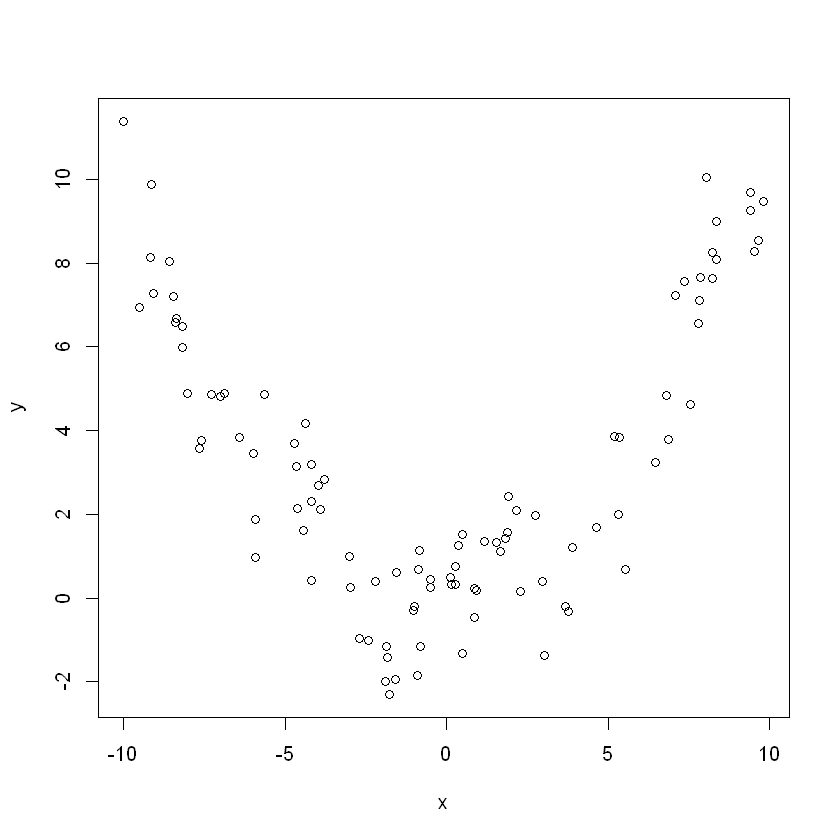

In [31]:
mydf = data.frame(x = runif(100,min = -10, max = 10))
mydf$y = sin(mydf$x) + .1*mydf$x^2 + rnorm(100)
plot(y ~ x, data = mydf)

**Lab-2.1.5**  Fit a linear model to this data. Use 10-fold CV to estimate the error. 

In [32]:
# INSERT CODE HERE

# Load library
library(boot)

# Generate dataset
set.seed(100)
mydf <- data.frame(x = runif(100, min = -10, max = 10))
mydf$y <- sin(mydf$x) + 0.1 * mydf$x^2 + rnorm(100)

# Ensure x and y are numeric (to avoid factor issues)
mydf$x <- as.numeric(mydf$x)
mydf$y <- as.numeric(mydf$y)

# Fit a linear regression model
lm_fit <- glm(y ~ x, data = mydf, family = gaussian)

# Define cost function for cross-validation
cost <- function(r, pi = 0) mean((r - pi)^2)

# Perform 10-Fold Cross-Validation
cv_10fold <- cv.glm(mydf, lm_fit, K = 10, cost = cost)

# Print the cross-validation error
cat("10-Fold CV Error:", cv_10fold$delta[1], "\n")



10-Fold CV Error: 9.264796 


**Lab-2.1.6**  Use the poly() function to fit a quadratic model to this data. Use 10-fold CV to estimate the error.

In [33]:
# INSERT CODE HERE

# Load Library
library(boot)

# Generate dataset
set.seed(100)
mydf <- data.frame(x = runif(100, min = -10, max = 10))
mydf$y <- sin(mydf$x) + 0.1 * mydf$x^2 + rnorm(100)

# Ensure x and y are numeric (to avoid factor issues)
mydf$x <- as.numeric(mydf$x)
mydf$y <- as.numeric(mydf$y)

# Fit a quadratic regression model using poly()
lm_fit_quad <- glm(y ~ poly(x, 2), data = mydf, family = gaussian)

# Define cost function for cross-validation
cost <- function(r, pi = 0) mean((r - pi)^2)

# Perform 10-Fold Cross-Validation
cv_10fold_quad <- cv.glm(mydf, lm_fit_quad, K = 10, cost = cost)

# Print the cross-validation error
cat("10-Fold CV Error for Quadratic Model:", cv_10fold_quad$delta[1], "\n")


10-Fold CV Error for Quadratic Model: 1.446231 


**Lab-2.1.7**  Repeat this for polynomials up to order 15. Make a plot of the generalization error (calculated from CV) versus the order of the polynomial. 

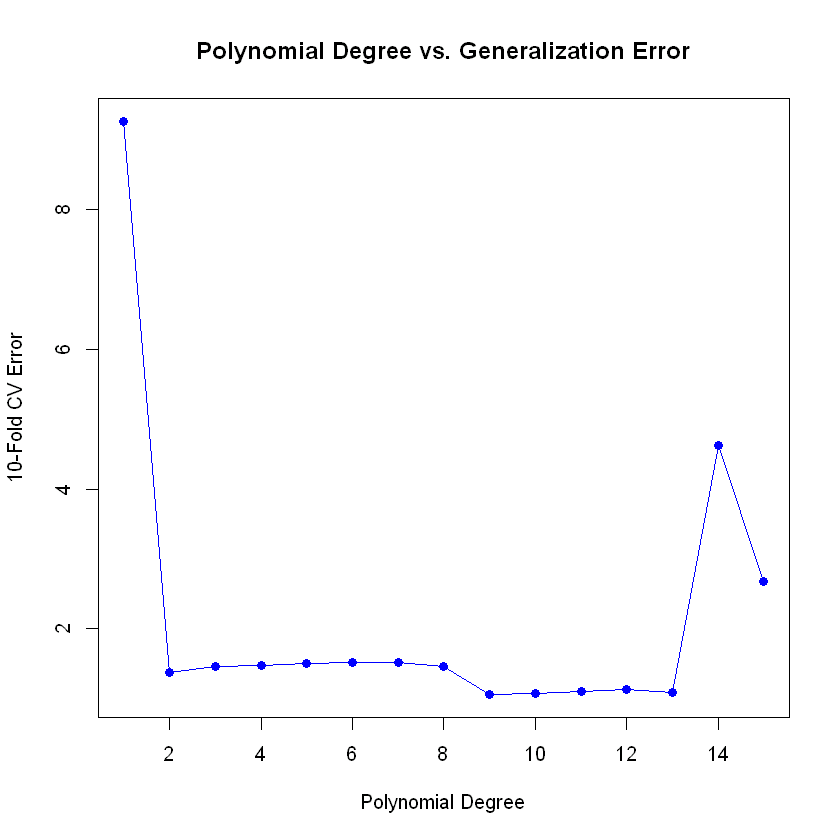

In [34]:
# INSERT CODE HERE

# Load necessary library
library(boot)

# Generate dataset
set.seed(100)
mydf <- data.frame(x = runif(100, min = -10, max = 10))
mydf$y <- sin(mydf$x) + 0.1 * mydf$x^2 + rnorm(100)

# Ensure x and y are numeric (to avoid factor issues)
mydf$x <- as.numeric(mydf$x)
mydf$y <- as.numeric(mydf$y)

# Define cost function for cross-validation
cost <- function(r, pi = 0) mean((r - pi)^2)

# Initialize vector to store CV errors
cv_errors <- numeric(15)  # Store errors for polynomials of degree 1 to 15

# Perform cross-validation for polynomial degrees 1 to 15
for (d in 1:15) {
  # Fit polynomial regression model
  lm_fit <- glm(y ~ poly(x, d), data = mydf, family = gaussian)
  
  # Compute 10-fold CV error
  cv_result <- cv.glm(mydf, lm_fit, K = 10, cost = cost)
  
  # Store the CV error
  cv_errors[d] <- cv_result$delta[1]
}

# Plot the results
plot(1:15, cv_errors, type = "o", col = "blue", pch = 16,
     xlab = "Polynomial Degree", ylab = "10-Fold CV Error",
     main = "Polynomial Degree vs. Generalization Error")
